In [2]:
#Importing libraries.
import os # input and output operations
import pandas as pd # for data manipulation and analysis
import numpy as np # used for data analysis
import matplotlib.pyplot as plt # used for data visualizations
import seaborn as sns # used for data visualizations
from collections import Counter # used to keep track of elements and their count

%matplotlib inline 

In [3]:
#Setting working directory

os.chdir(r"C:\\Users\\aditya joshi\\Edwisor\\cab fare prediction")

In [4]:
#Checking working directory
os.getcwd()

'C:\\Users\\aditya joshi\\Edwisor\\cab fare prediction'

In [4]:
## We are deleting row 1329 from the file because it has pickup_datetime value as 43.
train_cab = pd.read_csv("train_cab.csv", skiprows = [1328])

In [5]:
# Checking total number of observations and variables

train_cab.shape

(16066, 7)

In [6]:
# Knowing the datatypes of our predictors

train_cab.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [7]:
train_cab.head(1331)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [8]:
# More information about our dataset

train_cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16066.000000,16066.000000,16066.000000,16066.000000,16011.000000
mean,-72.462693,39.914675,-72.462233,39.897852,2.625171
std,10.578707,6.826797,10.575384,6.187276,60.846021
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734935,-73.991182,40.734647,1.000000
50%,-73.981697,40.752605,-73.980170,40.753566,1.000000
75%,-73.966837,40.767381,-73.963642,40.768015,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [9]:
#converting our fare_amount variable from object to numeric data type
train_cab['fare_amount'] = pd.to_numeric(train_cab['fare_amount'], errors = "coerce") 
#using "coerce" because it replaces all non numeric values with NaN

In [10]:
# Describe function given again to view fare_amount
train_cab.describe()
# We can observe here,outliers present in fare_amount,passenger_count,pickup_latitude

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16041.000000,16066.000000,16066.000000,16066.000000,16066.000000,16011.000000
mean,15.015223,-72.462693,39.914675,-72.462233,39.897852,2.625171
std,430.474362,10.578707,6.826797,10.575384,6.187276,60.846021
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734935,-73.991182,40.734647,1.000000
50%,8.500000,-73.981697,40.752605,-73.980170,40.753566,1.000000
75%,12.500000,-73.966837,40.767381,-73.963642,40.768015,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [11]:
# converting pickup_datetime variable from object to numeric data type
train_cab['pickup_datetime'] =  pd.to_datetime(train_cab['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [12]:
train_cab.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

In [13]:
#separating datetime variable into year, month, date, day, hour,minute
train_cab['year'] = train_cab['pickup_datetime'].dt.year
train_cab['month'] = train_cab['pickup_datetime'].dt.month
train_cab['date'] = train_cab['pickup_datetime'].dt.day
train_cab['day'] = train_cab['pickup_datetime'].dt.dayofweek
train_cab['hour'] = train_cab['pickup_datetime'].dt.hour
train_cab['minute'] = train_cab['pickup_datetime'].dt.minute


In [14]:
train_cab.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
month                         int64
date                          int64
day                           int64
hour                          int64
minute                        int64
dtype: object

In [15]:
#data with new variables
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51


In [16]:
# Total number of missing values in our dataset
train_cab.isnull().sum()

fare_amount          25
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
year                  0
month                 0
date                  0
day                   0
hour                  0
minute                0
dtype: int64

In [17]:
#deleting observations with missing value in fare_amount
train_cab = train_cab.drop(train_cab[train_cab['fare_amount'].isnull()].index, axis = 0)

In [18]:
#deleting observations with missing value in passenger_count
train_cab = train_cab.drop(train_cab[train_cab['passenger_count'].isnull()].index, axis = 0)

In [19]:
train_cab.isnull().sum()
#no missing values,moving towards outliers detection

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
minute               0
dtype: int64

In [20]:
#OUTLIER ANALYSIS
#FARE_AMOUNT
train_cab['fare_amount'].describe()
#It clearly defines outliers


count    15986.000000
mean        15.030453
std        431.213944
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [30]:
#SORTING FARE_AMOUNT TO GET A BETTER IDEA
train_cab['fare_amount'].sort_values(ascending = False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1334       180.00
1482       165.00
6629       128.83
14141      108.00
12348      104.67
12914       96.00
7809        95.00
9430        88.00
10076       87.30
12613       87.00
4619        85.50
14518       82.50
12436       80.75
2638        79.00
4012        77.70
13961       77.15
2012        77.00
6667        76.80
8362        76.00
10523       75.80
11018       75.33
13614       75.00
15022       73.30
1493        70.00
4117        69.70
649         66.30
           ...   
12177        2.50
3426         2.50
3167         2.50
12597        2.50
12342        2.50
6296         2.50
4083         2.50
14303        2.50
4538         2.50
11152        2.50
2305         2.50
9176         2.50
657          2.50
14573        2.50
11061        2.50
13487        2.50
8794         2.50
13570        2.50
11221        2.50
14632        2.50
4366         2.50
15256        2.50
13220        2.50
4320         2.50
1426      

In [21]:
#DELETING MAXIMUM AND MINIMUM VALUES IN FARE_AMOUNT
train_cab = train_cab.drop(train_cab[train_cab['fare_amount'] < 1].index, axis = 0)

train_cab = train_cab.drop(train_cab[train_cab['fare_amount'] > 453].index, axis = 0)

In [22]:
train_cab['fare_amount'].sort_values(ascending = False)
#the maximum values and minimum values are deleted.

607      453.00
980      434.00
1334     180.00
1482     165.00
6629     128.83
14141    108.00
12348    104.67
12914     96.00
7809      95.00
9430      88.00
10076     87.30
12613     87.00
4619      85.50
14518     82.50
12436     80.75
2638      79.00
4012      77.70
13961     77.15
2012      77.00
6667      76.80
8362      76.00
10523     75.80
11018     75.33
13614     75.00
15022     73.30
1493      70.00
4117      69.70
9650      66.30
649       66.30
1708      65.50
          ...  
10704      2.50
13487      2.50
3167       2.50
12177      2.50
13220      2.50
6631       2.50
6702       2.50
6764       2.50
9772       2.50
15369      2.50
1418       2.50
6006       2.50
503        2.50
4366       2.50
8679       2.50
8602       2.50
4320       2.50
226        2.50
9620       2.50
8595       2.50
8915       2.50
7907       2.50
3557       2.50
10110      2.50
8546       2.50
7917       2.50
15256      2.50
13876      2.50
6001       2.50
1426       1.14
Name: fare_amount, Lengt

In [23]:
#finding outliers in pickup_longitude
#longitude values should be -180 to +180
train_cab[train_cab['pickup_longitude'] < -180]
train_cab[train_cab['pickup_longitude'] > +180]
#no outliers in pickup_longitude

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute


In [24]:
#finding outliers in pickup_latitude
#longitude values should be -90 to +90
train_cab[train_cab['pickup_latitude'] < -90]
train_cab[train_cab['pickup_latitude'] > +90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
5685,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,2011,7,30,5,11,15


In [25]:
#delete the found outlier in pickup_latitude
train_cab = train_cab.drop(train_cab[train_cab['pickup_latitude'] > +90].index, axis = 0)

In [26]:
#finding outliers in dropoff_longitude
#longitude values should be -180 to +180
train_cab[train_cab['dropoff_longitude'] < -180]
train_cab[train_cab['dropoff_longitude'] > +180]
#no outliers

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute


In [27]:
#finding outliers in dropoff_longitude
#longitude values should be -90 to +90
train_cab[train_cab['dropoff_latitude'] < -90]
train_cab[train_cab['dropoff_latitude'] > +90]
#outliers deleted

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute


In [35]:
#finding outliers in passenger_count
train_cab['passenger_count'].sort_values(ascending = False)


1173     6.0
15422    6.0
14742    6.0
5524     6.0
7347     6.0
11747    6.0
10691    6.0
198      6.0
15412    6.0
10656    6.0
10654    6.0
15784    6.0
11759    6.0
15084    6.0
3084     6.0
3867     6.0
1712     6.0
12681    6.0
13691    6.0
188      6.0
1707     6.0
6816     6.0
2432     6.0
3878     6.0
7895     6.0
15048    6.0
4866     6.0
8880     6.0
11635    6.0
10809    6.0
        ... 
9768     1.0
9767     1.0
9765     1.0
9764     1.0
9793     1.0
9794     1.0
9795     1.0
9796     1.0
9830     1.0
9828     1.0
9827     1.0
9826     1.0
9825     1.0
9823     1.0
9822     1.0
9821     1.0
9819     1.0
9818     1.0
9817     1.0
9813     1.0
9811     1.0
9810     1.0
9808     1.0
9807     1.0
9806     1.0
9805     1.0
9803     1.0
9800     1.0
9797     1.0
0        1.0
Name: passenger_count, Length: 15901, dtype: float64

In [28]:
#total number of outliers
print(Counter(train_cab['passenger_count'] < 1))
print(Counter(train_cab['passenger_count'] > 6))

Counter({False: 15920, True: 58})
Counter({False: 15959, True: 19})


In [29]:
#deleting outliers in passenger_count
train_cab = train_cab.drop(train_cab[train_cab['passenger_count'] < 1].index, axis = 0)
train_cab = train_cab.drop(train_cab[train_cab['passenger_count'] > 6].index, axis = 0)

In [30]:
train_cab['passenger_count'].sort_values(ascending = False)
#outliers removed

1173     6.0
15422    6.0
14742    6.0
5524     6.0
7347     6.0
11747    6.0
10691    6.0
198      6.0
15412    6.0
10656    6.0
10654    6.0
15784    6.0
11759    6.0
15084    6.0
3084     6.0
3867     6.0
1712     6.0
12681    6.0
13691    6.0
188      6.0
1707     6.0
6816     6.0
2432     6.0
3878     6.0
7895     6.0
15048    6.0
4866     6.0
8880     6.0
11635    6.0
10809    6.0
        ... 
9768     1.0
9767     1.0
9765     1.0
9764     1.0
9793     1.0
9794     1.0
9795     1.0
9796     1.0
9830     1.0
9828     1.0
9827     1.0
9826     1.0
9825     1.0
9823     1.0
9822     1.0
9821     1.0
9819     1.0
9818     1.0
9817     1.0
9813     1.0
9811     1.0
9810     1.0
9808     1.0
9807     1.0
9806     1.0
9805     1.0
9803     1.0
9800     1.0
9797     1.0
0        1.0
Name: passenger_count, Length: 15901, dtype: float64

In [31]:
#applying haversine formula to calculate distance from the latitude and longitude variables.
#importing library
import math

def haversine(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2]
    lat2 = a[3]
     #convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    #Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    km = 6371 * c
    return km
    
    

In [32]:
#FEATURE ENGINEERING
#create a new variable using the above Havsersine function and deriving new variables from existing ones
train_cab['distance'] = train_cab[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(haversine, axis = 1)

In [33]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [34]:
#clearing outliers in distance
#descending order
train_cab['distance'].sort_values(ascending = False)

9146     8667.542104
8646     8667.497512
2396     8667.454421
472      8667.304968
11652    8666.701504
13339    8666.613646
10214    8666.584706
4596     8666.566030
10457    8665.976222
10671    8665.702390
10487    8665.555634
1260     8665.268588
4277     8665.223767
6187     8664.191488
12982    8664.131808
6301     8663.039123
12704    8661.362152
14196    8657.136619
15782    8656.714168
15748    6028.926779
2279     6026.494216
5863     5420.988959
7013     4447.086698
10709     129.950482
14535     129.560455
11618     127.509261
12227     123.561157
5662      101.094619
1683       99.771579
3074       97.985088
            ...     
7683        0.000000
4297        0.000000
13142       0.000000
3127        0.000000
8644        0.000000
8376        0.000000
4239        0.000000
2446        0.000000
4366        0.000000
11564       0.000000
13080       0.000000
13061       0.000000
4453        0.000000
13012       0.000000
13014       0.000000
808         0.000000
6461        0

In [36]:
#removing outliers
train_cab = train_cab.drop((train_cab[train_cab['distance'] == 0]).index, axis = 0)
train_cab = train_cab.drop((train_cab[train_cab['distance'] > 130]).index, axis = 0)


In [37]:
#outliers removed
train_cab['distance'].sort_values(ascending = False)

10709    129.950482
14535    129.560455
11618    127.509261
12227    123.561157
5662     101.094619
1683      99.771579
3074      97.985088
9898      97.670590
4486      95.852036
9807      93.925599
7400      92.605848
12348     43.648755
649       39.476975
6307      37.812945
4117      32.602535
7020      29.478280
6676      26.369072
4566      25.735917
8104      24.690884
15022     24.125745
15177     23.814940
14098     23.696200
12432     23.513721
4267      23.196680
3215      23.184092
4298      23.168706
12940     23.114168
13803     23.077267
538       23.066627
13597     23.037380
            ...    
6001       0.004982
8772       0.004829
15529      0.004709
14529      0.004059
184        0.003982
8370       0.003434
3644       0.003173
14632      0.003069
5592       0.003054
14474      0.002842
9927       0.002838
1493       0.002733
9011       0.002693
4057       0.002687
8733       0.002616
616        0.002507
10257      0.002235
15369      0.002234
8602       0.002232


In [38]:
#removing pickup_datetime,pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude as they do not contribute to the data anymore
print(train_cab.columns)

deletefew = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'minute']

train_cab = train_cab.drop(deletefew, axis = 1)



Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'date', 'day', 'hour', 'minute', 'distance'],
      dtype='object')


In [39]:
print(train_cab.columns)

Index(['fare_amount', 'passenger_count', 'year', 'month', 'date', 'day',
       'hour', 'distance'],
      dtype='object')


In [40]:
#converting passenger_count to int64
print(train_cab.dtypes)

train_cab['passenger_count'] = train_cab['passenger_count'].astype('int64')

print(train_cab.dtypes)

fare_amount        float64
passenger_count    float64
year                 int64
month                int64
date                 int64
day                  int64
hour                 int64
distance           float64
dtype: object
fare_amount        float64
passenger_count      int64
year                 int64
month                int64
date                 int64
day                  int64
hour                 int64
distance           float64
dtype: object


In [41]:
# Storing continuous variables into num_var object
num_var = ['fare_amount', 'distance']
# Storing categorical variables into cat_var object
cat_var = ['passenger_count', 'year', 'month', 'date', 'day', 'hour']

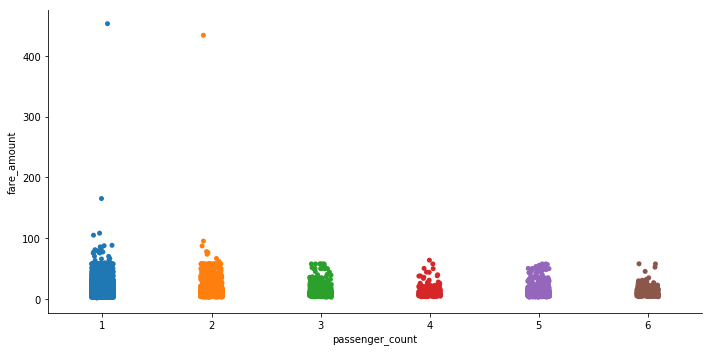

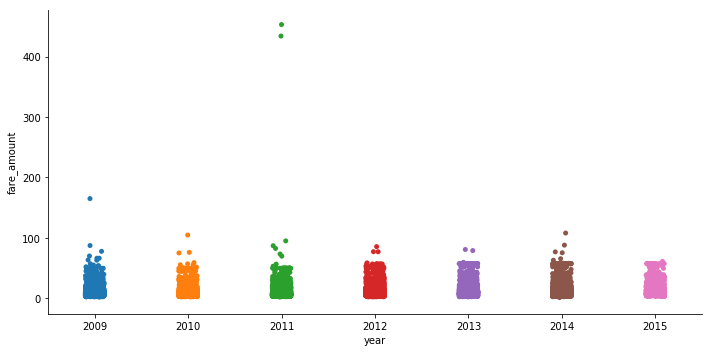

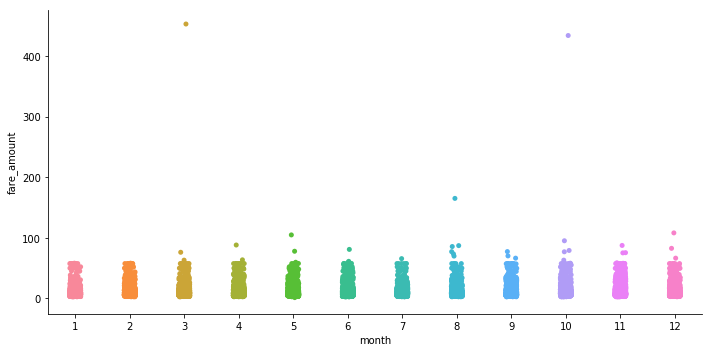

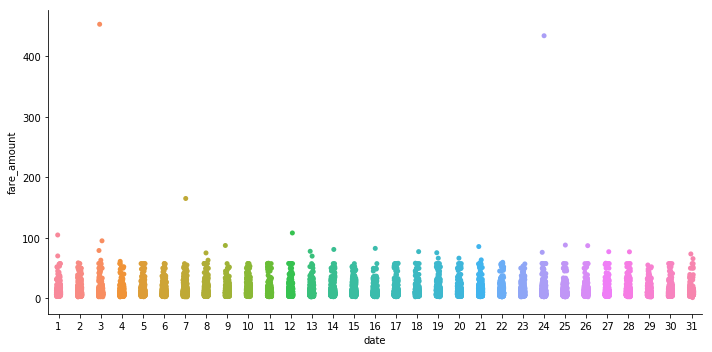

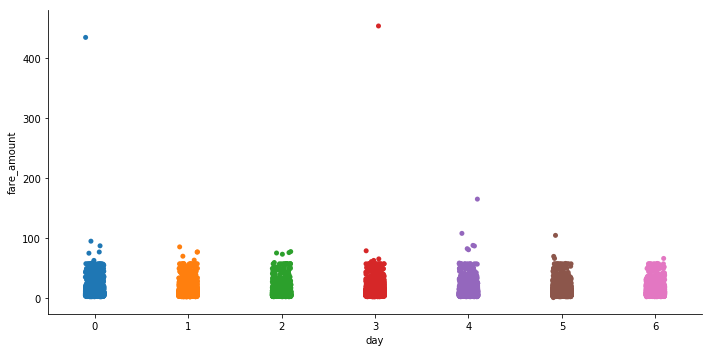

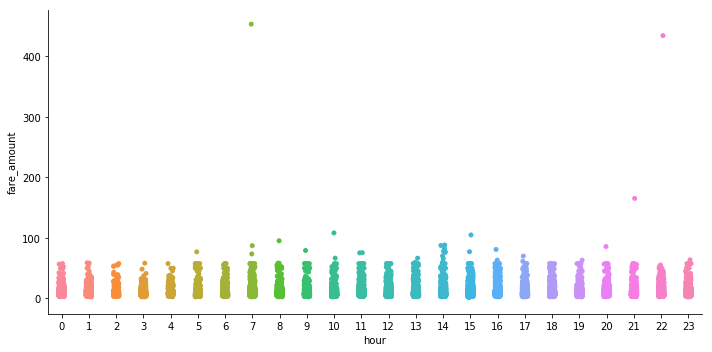

In [42]:
#VISUALIZATIONS
#visualisng the relationship between fare_amount and cat_var
for i in cat_var:
    sns.catplot(x = i, y = "fare_amount", data=train_cab, height = 5, aspect = 2)
    figname = str(i)+'.pdf'

In [ ]:
#Single passenger pays high fare and 6 passengers at once contributes less fare
#In 2011, the fare is at peak and in 2015 fare is at lowest
#March has high fare, july got low fare
#On monday, thursday and friday fare is high, remaining like, sunday has low fare
#Morning 7 am and night 10 pm are the expensive hours, 3 am and 12 pm are not expensive

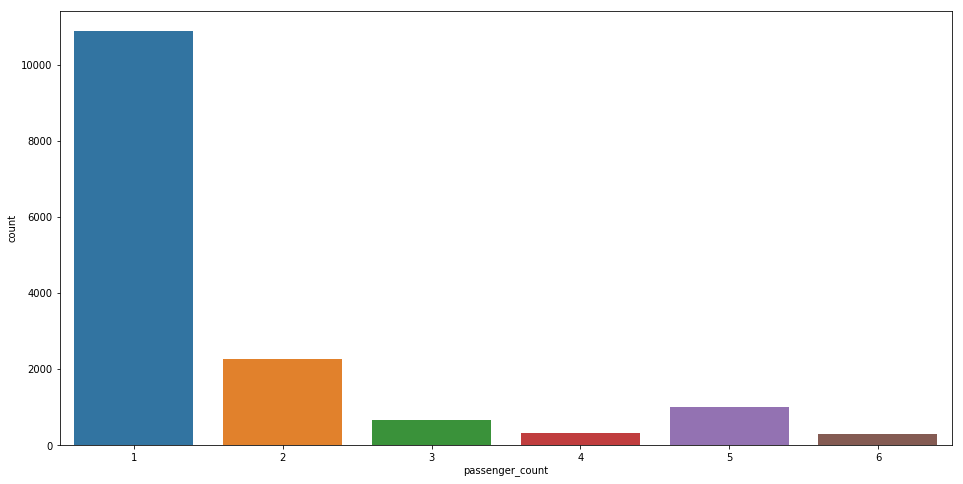

In [43]:
#which passenger count are the most frequent travel?
plt.figure(figsize = (16,8))
sns.countplot(x = 'passenger_count', data = train_cab)
#Single Passengers are the most frequent travellers

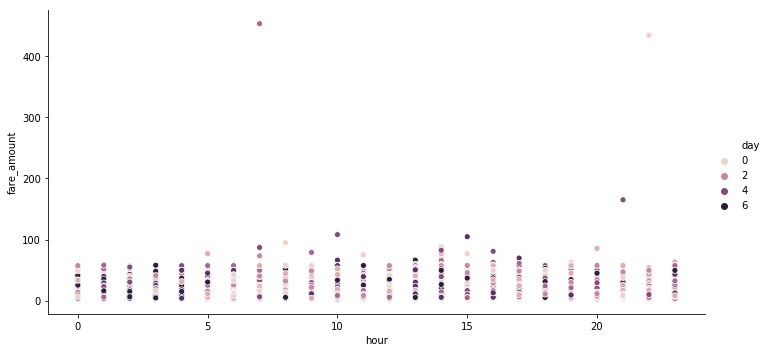

In [44]:
#how fare_amount varies with hour and day together?
sns.relplot(x="hour", y="fare_amount", hue="day", data=train_cab, height = 5, aspect = 2)
#The fare is highest, when hour is 7 am and 10 pm, and when days are Monday, Thursday and Friday

In [45]:
#FEATURE SELECTION
#In Feature Selection,we perform Correlation Analysis and Anova test
#Correlation Analysis is performed between num_var (numeirc independent variables) & fare-amount(continuous target variable)
train_cab_cor = train_cab.loc[:, num_var]
# generate corrleation
cor_result = train_cab_cor.corr()

print(cor_result)

             fare_amount  distance
fare_amount     1.000000  0.609284
distance        0.609284  1.000000


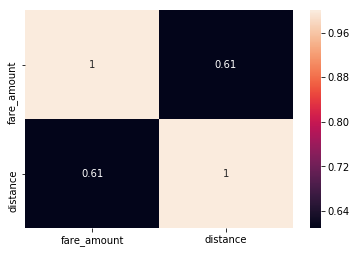

In [46]:
# Heatmap between fare_amount and distance

ax = sns.heatmap(cor_result, annot=True)

In [47]:
#Anova Test is performed between cat_var (categorical independent variables) & fare_amount(continuous target variable)
#importing libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in cat_var:
    mod = ols('fare_amount' + '~' + i, data = train_cab).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

                       sum_sq       df         F    PR(>F)
passenger_count  7.412790e+01      1.0  0.650559  0.419925
Residual         1.757260e+06  15422.0       NaN       NaN
                sum_sq       df           F        PR(>F)
year      1.765442e+04      1.0  156.503813  9.795817e-36
Residual  1.739680e+06  15422.0         NaN           NaN
                sum_sq       df          F    PR(>F)
month     2.393332e+03      1.0  21.032028  0.000005
Residual  1.754941e+06  15422.0        NaN       NaN
                sum_sq       df         F    PR(>F)
date      1.051343e+02      1.0  0.922692  0.336784
Residual  1.757229e+06  15422.0       NaN       NaN
                sum_sq       df         F    PR(>F)
day       6.935365e+00      1.0  0.060864  0.805139
Residual  1.757327e+06  15422.0       NaN       NaN
                sum_sq       df          F    PR(>F)
hour      1.203834e+03      1.0  10.571838  0.001151
Residual  1.756130e+06  15422.0        NaN       NaN


In [48]:
#few variables have P value > 0.05 hence we accept null hypothesis
#variables shouldn't be carried for model development

print(train_cab.columns)

deletefew2 = ['passenger_count', 'date', 'day']

train_cab = train_cab.drop(deletefew2, axis = 1)

print(train_cab.columns)

Index(['fare_amount', 'passenger_count', 'year', 'month', 'date', 'day',
       'hour', 'distance'],
      dtype='object')
Index(['fare_amount', 'year', 'month', 'hour', 'distance'], dtype='object')


In [49]:
# Storing latest categorical variables into cat_var object
cat_var = ['year', 'month', 'hour']

In [ ]:
#FEATURE SELECTION

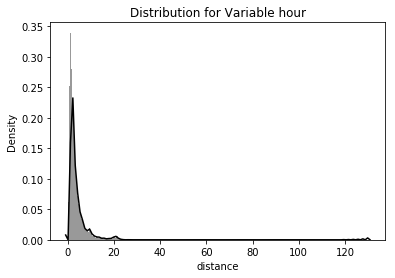

In [50]:
#checking skewness for the distance variable
sns.distplot(train_cab['distance'],bins='auto',color='black')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()


In [51]:
#Using log function to reduce the skewness in distance

train_cab['distance'] = np.log(train_cab['distance'])

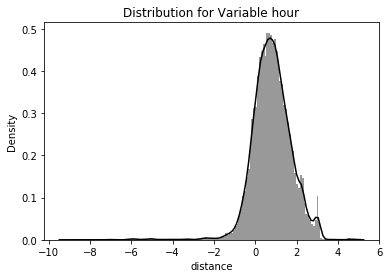

In [52]:

sns.distplot(train_cab['distance'],bins='auto',color='black')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()
#the data is normalized

In [53]:
# Exploratory data analysis, missing value and outlier analysis, feature selection, feature scaling is done. Data is ready

# Its a regression problem. So, we are starting with Linear Regression

# It will be followed by Decision Tree, then Random Forest, then tuning Hyperparameters

# # Let's create a copy of data for further reference

train_cab2 = train_cab.copy()
train_cab = train_cab2.copy()

In [54]:
# Now, let's import few libraries, required for model development

from sklearn.model_selection import train_test_split #used to split dataset into train and test
from sklearn.metrics import mean_squared_error # used to calculate MSE
from sklearn.metrics import r2_score # used to calculate r square
from sklearn.linear_model import LinearRegression # Machine Algorithm 
from sklearn.tree import DecisionTreeRegressor # Machine Algorithm 
from sklearn.ensemble import RandomForestRegressor # Machine Algorithm 
from pprint import pprint # used in tuning 
from sklearn.model_selection import GridSearchCV # used to tune hyper parameters  
from sklearn.model_selection import RandomizedSearchCV # used to tune hyper parameters 
from math import sqrt

In [55]:
# Before going for model development, we need to split the data into train data and test data.

X_train, X_test, y_train, y_test = train_test_split(train_cab.iloc[:, train_cab.columns != 'fare_amount'],
                                                   train_cab.iloc[:, 0], test_size = 0.20, random_state = 1)

In [59]:
# Building LRModel on training data
LRModel = LinearRegression().fit(X_train, y_train)

# Predicting LRModel on train data
LRTrain = LRModel.predict(X_train)

# Predicting LRModel on test data
LRTest = LRModel.predict(X_test)

# Calculating RMSE for train data
LRTrain_RMSE = np.sqrt(mean_squared_error(y_train, LRTrain))
print('RMSE for train data = ' +str(LRTrain_RMSE))

# Calculating RMSE for test data
LRTest_RMSE = np.sqrt(mean_squared_error(y_test, LRTest))
print('RMSE for test data = ' +str(LRTest_RMSE))

# Calculating Rsquare for train data
LRTrain_rsquare = r2_score(y_train, LRTrain)
print('Rsquare for train data = ' +str(LRTrain_rsquare))

# Calculating Rsquare for test data
LRTest_rsquare = r2_score(y_test, LRTest)
print('Rsquare for test data = ' +str(LRTest_rsquare))

RMSE for train data = 9.264227551993713
RMSE for test data = 6.219814989887584
Rsquare for train data = 0.3057507904124328
Rsquare for test data = 0.48430011267434425


In [60]:
# Building DTModel on training data
DTModel = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

# Predicting DTModel on train data
DTTrain = DTModel.predict(X_train)

# Predicting DTModel on test data
DTTest = DTModel.predict(X_test)

# Calculating RMSE for train data
DTTrain_RMSE = np.sqrt(mean_squared_error(y_train, DTTrain))
print('RMSE for train data = ' +str(DTTrain_RMSE))

# Calculating RMSE for test data
DTTest_RMSE = np.sqrt(mean_squared_error(y_test, DTTest))
print('RMSE for test data = ' +str(DTTest_RMSE))

# Calculating Rsquare for train data
DTTrain_rsquare = r2_score(y_train, DTTrain)
print('Rsquare for train data = ' +str(DTTrain_rsquare))

# Calculating Rsquare for test data
DTTest_rsquare = r2_score(y_test, DTTest)
print('Rsquare for test data = ' +str(DTTest_rsquare))

RMSE for train data = 7.6015436393085505
RMSE for test data = 4.504301201426909
Rsquare for train data = 0.5325872525943498
Rsquare for test data = 0.729543794174398


In [61]:
# Building RFModel on training data
RFModel = RandomForestRegressor(n_estimators = 200).fit(X_train, y_train)

# Predicting RFModel on train data
RFTrain = RFModel.predict(X_train)

# Predicting RFModel on test data
RFTest = RFModel.predict(X_test)

# Calculating RMSE for train data
RFTrain_RMSE = np.sqrt(mean_squared_error(y_train, RFTrain))
print('RMSE for train data = ' +str(RFTrain_RMSE))

# Calculating RMSE for test data
RFTest_RMSE = np.sqrt(mean_squared_error(y_test, RFTest))
print('RMSE for test data = ' +str(RFTest_RMSE))

# Calculating Rsquare for train data
RFTrain_rsquare = r2_score(y_train, RFTrain)
print('Rsquare for train data = ' +str(RFTrain_rsquare))

# Calculating Rsquare for test data
RFTest_rsquare = r2_score(y_test, RFTest)
print('Rsquare for test data = ' +str(RFTest_rsquare))

RMSE for train data = 2.792642758878891
RMSE for test data = 3.89497610356505
Rsquare for train data = 0.936914763874684
Rsquare for test data = 0.7977671518748402


In [62]:
# We started the parameter tuning journey with RandomizedSearchCV

rf = RandomForestRegressor(random_state = 42)
print('parameters in use:\n')
pprint(rf.get_params())

parameters in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [63]:
# Building RandomizedSearchCV
RRF = RandomForestRegressor(random_state = 0)

# Create grid
ran_sear = {'n_estimators': list(range(1,20,2)),
           'max_depth': list(range(1,100,2))}

randcv_rf = RandomizedSearchCV(RRF, param_distributions = ran_sear, n_iter = 5, cv = 5, random_state = 0)

randcv_rf = randcv_rf.fit(X_train, y_train)
view_best_params_RRF = randcv_rf.best_params_

#Apply model on test data
predictions_RRF = randcv_rf.predict(X_test)

# Calculating Rsquare
RRF_rsquare = r2_score(y_test, predictions_RRF)

# Calculating RMSE
RRF_RMSE = np.sqrt(mean_squared_error(y_test, predictions_RRF))

print('Randomized Search CV Result:')
print('Best Parameters =', view_best_params_RRF)
print('R-Squared = {:0.2}.'.format(RRF_rsquare))
print('RMSE = ' ,RRF_RMSE)

Randomized Search CV Result:
Best Parameters = {'n_estimators': 15, 'max_depth': 9}
R-Squared = 0.8.
RMSE =  3.8873663314404117


In [64]:
# Building GridSearchCV
GRF = RandomForestRegressor(random_state = 0)

# Create grid
ran_sear2 = {'n_estimators': list(range(1,20,2)),
           'max_depth': list(range(1,10,2))}

gridcv_rf = GridSearchCV(GRF, param_grid = ran_sear2, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train, y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

# Rsquare
GRF_rsquare = r2_score(y_test, predictions_GRF)

#Calculating RMSE
GRF_RMSE = np.sqrt(mean_squared_error(y_test, predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_rsquare))
print('RMSE = ',(GRF_RMSE))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 11}
R-squared = 0.8.
RMSE =  3.830759661692142


In [65]:
#output
data = {'RMSE':[LRTest_RMSE, DTTest_RMSE, RFTest_RMSE, RRF_RMSE, GRF_RMSE], 'Rsquare':[LRTest_rsquare, DTTest_rsquare, RFTest_rsquare, RRF_rsquare, GRF_rsquare]}

df = pd.DataFrame(data, index = ['Linear Regression', 'Decision Tree', 'Random Forest', 'RandomizedSearch CV', 'GridSearch CV'])

df

,RMSE,Rsquare
Linear Regression,6.219815,0.484300
Decision Tree,4.504301,0.729544
Random Forest,3.894976,0.797767
RandomizedSearch CV,3.887366,0.798557
GridSearch CV,3.830760,0.804381


In [66]:
# Importing the test data into Jupyter Environment

test_cab = pd.read_csv("test.csv")

In [67]:
# Viewing first 5 observations of our new data

test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [68]:
# Checking total number of observations and variables

test_cab.shape

(9914, 6)

In [69]:
# Knowing the type of our data

type(test_cab)

pandas.core.frame.DataFrame

In [70]:
# Knowing the datatypes of our predictors

test_cab.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [72]:
# Next, we shall go for converting our fare_amount variable from object to numeric data type

test_cab['pickup_datetime'] =  pd.to_datetime(test_cab['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC')

In [73]:
test_cab.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [74]:
# We are given with datetime varibale, however, we have no idea how to deal with it in a regression problem.

# We took help in google and found out we can separate datetime variable into year, month, date, day, hour, minute.

# Here's the code to split datetime variable

test_cab['year'] = test_cab['pickup_datetime'].dt.year
test_cab['month'] = test_cab['pickup_datetime'].dt.month
test_cab['date'] = test_cab['pickup_datetime'].dt.day
test_cab['day'] = test_cab['pickup_datetime'].dt.dayofweek
test_cab['hour'] = test_cab['pickup_datetime'].dt.hour
test_cab['minute'] = test_cab['pickup_datetime'].dt.minute

In [75]:
# Let's check our new varibales

test_cab.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
month                         int64
date                          int64
day                           int64
hour                          int64
minute                        int64
dtype: object

In [76]:
# Here's the view about our data with new variables

test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12


In [77]:
# Total number of missing values in our dataset variables

test_cab.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
date                 0
day                  0
hour                 0
minute               0
dtype: int64

In [78]:
# Here we are, let's go ahead with finding missing values in pickup_longitude

# It's time to learn what are the values, that are not accepted in longitude range.

# From Google, its clear, longitude values should be -180 to +180

test_cab[test_cab['pickup_longitude'] < -180]
test_cab[test_cab['pickup_longitude'] > +180]

# We can observe there's no outliers in pickup_longitude

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute


In [79]:
# We shall do the same as above for pickup_latitude, and remember, latitude should be -90 to +90

test_cab[test_cab['pickup_latitude'] < -90]
test_cab[test_cab['pickup_latitude'] > +90]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute


In [80]:
# Time to do the same as above for dropoff_longitude

test_cab[test_cab['dropoff_longitude'] < -180]
test_cab[test_cab['dropoff_longitude'] > +180]

# We can observe there's no outliers in dropoff_longitude

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute


In [81]:
# Time to do the same as above for dropoff_latitude

test_cab[test_cab['dropoff_latitude'] < -90]
test_cab[test_cab['dropoff_latitude'] > +90]

# We can observe there's no outliers in dropoff_latitude

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute


In [82]:
# Put our hands on passenger_count outliers

test_cab['passenger_count'].sort_values(ascending = False)

9913    6
9780    6
9800    6
9799    6
9798    6
9797    6
9796    6
9795    6
9794    6
9793    6
9792    6
9791    6
9790    6
9789    6
9788    6
9787    6
9786    6
9785    6
9784    6
9783    6
9782    6
9801    6
9802    6
9803    6
9814    6
9822    6
9821    6
9820    6
9819    6
9818    6
       ..
4642    1
4643    1
4620    1
4618    1
4593    1
4617    1
4594    1
4595    1
4596    1
4597    1
4598    1
4599    1
4600    1
4601    1
4602    1
4603    1
4604    1
4605    1
4606    1
4607    1
4608    1
4609    1
4610    1
4611    1
4612    1
4613    1
4614    1
4615    1
4616    1
0       1
Name: passenger_count, Length: 9914, dtype: int64

In [89]:
import math

def haversine(a):
    lon1 = a[0]
    lat1 = a[1]
    lon2 = a[2]
    lat2 = a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees).
    Source: https://gis.stackexchange.com/a/56589/15183
    """
    # convert decimal degrees to radians 
    
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula 
    
    dlon = lon2 - lon1 
    
    dlat = lat2 - lat1 
    
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    
    c = 2 * math.asin(math.sqrt(a)) 
    
    km = 6371 * c
    
    return km

In [90]:
# Time to create a new variable using the above Havsersine function

# The process we are experiencing now, can be coined as - FEATURE ENGINEERING - deriving new variables from existing ones

test_cab['distance'] = test_cab[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(haversine, axis = 1)

In [91]:
# Let's check our new derived feature names as distance

test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [92]:
# Its time to clear outliers in distance, if present any

# Let's sort distance to get the idea

test_cab['distance'].sort_values(ascending = False)

# We can observe, we need to delete those observations having distance < 1

4080    99.996040
8529    98.192419
5887    97.240975
7269    33.604366
4334    28.837177
3569    27.863332
5115    27.653128
9391    27.287881
4864    27.169511
706     25.565980
2487    25.364627
5865    23.443658
5357    23.120250
5905    23.099448
2175    23.051119
8173    22.640229
7787    22.474632
2718    22.407984
248     22.344419
5373    22.132067
8825    22.113966
7346    22.080922
6260    22.064573
628     21.880433
5523    21.880030
7000    21.845869
8876    21.811484
8944    21.785143
7857    21.782684
4018    21.738063
          ...    
121      0.000000
2641     0.000000
1218     0.000000
1429     0.000000
7839     0.000000
451      0.000000
981      0.000000
2675     0.000000
1409     0.000000
7874     0.000000
6954     0.000000
976      0.000000
2618     0.000000
498      0.000000
5443     0.000000
8426     0.000000
8424     0.000000
491      0.000000
318      0.000000
1189     0.000000
2247     0.000000
2936     0.000000
6157     0.000000
9221     0.000000
860      0

In [93]:
# Line of code to delete the outliers in distance

test_cab = test_cab.drop(test_cab[test_cab['distance'] == 0].index, axis = 0)

In [94]:
# Let's check whether the outliers are cleared

test_cab['distance'].sort_values(ascending = False)

4080    99.996040
8529    98.192419
5887    97.240975
7269    33.604366
4334    28.837177
3569    27.863332
5115    27.653128
9391    27.287881
4864    27.169511
706     25.565980
2487    25.364627
5865    23.443658
5357    23.120250
5905    23.099448
2175    23.051119
8173    22.640229
7787    22.474632
2718    22.407984
248     22.344419
5373    22.132067
8825    22.113966
7346    22.080922
6260    22.064573
628     21.880433
5523    21.880030
7000    21.845869
8876    21.811484
8944    21.785143
7857    21.782684
4018    21.738063
          ...    
7039     0.057109
1686     0.055740
7723     0.055065
6005     0.050825
4523     0.049704
2364     0.049493
7731     0.049473
2988     0.042502
9827     0.036522
4786     0.035839
4023     0.035212
1928     0.035158
545      0.034713
4676     0.031828
3656     0.030301
8175     0.029933
7719     0.025309
104      0.025130
7068     0.024403
9367     0.023768
2974     0.014678
3233     0.014187
5669     0.012239
525      0.009642
4608     0

In [95]:
# We almost cleaned our data, but now, let's question, are all these variables are useful to proceed further

# We decided to delete pickup_datetime variables as we have substitutes of it and we are not dealing time series analysis

# We also decided to remove pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude as we have distance

print(test_cab.columns)

deletefew = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'minute']

test_cab = test_cab.drop(deletefew, axis = 1)

print(test_cab.columns) # shows latest columns

Index(['pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'date', 'day', 'hour', 'minute', 'distance'],
      dtype='object')
Index(['passenger_count', 'year', 'month', 'date', 'day', 'hour', 'distance'], dtype='object')


In [96]:
# We are going for this step because, during model development, we deleted few varaibles based on anova test

# The variables in the test case should exactly match with the variables in the trained model 

print(test_cab.columns)

deletefew3 = ['passenger_count', 'date', 'day']

test_cab = test_cab.drop(deletefew3, axis = 1)

print(test_cab.columns)

Index(['passenger_count', 'year', 'month', 'date', 'day', 'hour', 'distance'], dtype='object')
Index(['year', 'month', 'hour', 'distance'], dtype='object')


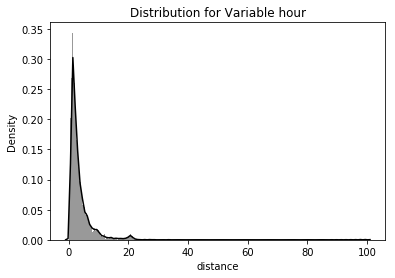

In [97]:
# Normalizing distance variable 

# We shall check for normality for distance. Let's first check about the skewness of the distance variable

sns.distplot(test_cab['distance'],bins='auto',color='black')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# We can observe, the variable is left skewed.

In [98]:
# Using log function to reduce the skewness in distance

test_cab['distance'] = np.log(test_cab['distance'])

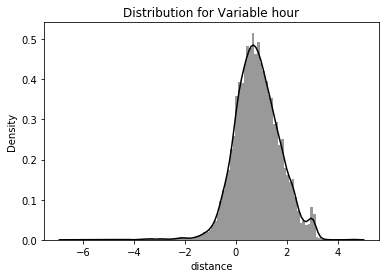

In [99]:
# We shall check for normality again

sns.distplot(test_cab['distance'],bins='auto',color='black')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

# We can observe now, after applying log function, the data is normalised

In [100]:
# We are going to use RandomizedSearchCV Model as it gave the best results while training model

# Building GridSearchCV

GRF = RandomForestRegressor(random_state = 0)

# Create grid
ran_sear2 = {'n_estimators': list(range(1,20,2)),
           'max_depth': list(range(1,10,2))}

gridcv_rf = GridSearchCV(GRF, param_grid = ran_sear2, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train, y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(test_cab)

In [101]:
# Fianlly creating new variable - Predicted Fare Amount

test_cab['Predicted fare_amount'] = predictions_GRF

In [102]:
test_cab.head()

,year,month,hour,distance,Predicted fare_amount
0,2015,1,13,0.842971,9.062778
1,2015,1,13,0.885977,9.325481
2,2011,10,11,-0.480251,5.476132
3,2012,12,21,0.673471,8.595973
4,2012,12,21,1.684045,14.408911
